In [13]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [32]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [33]:
train_X.shape

(60000, 28, 28)

In [29]:
train_y[0]

5

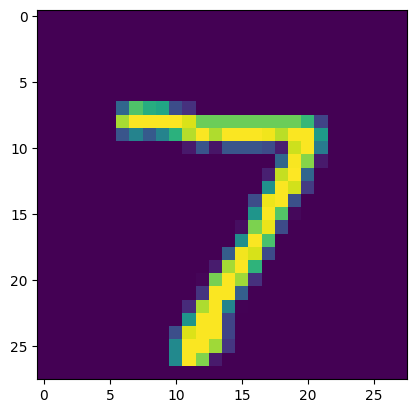

In [30]:
plt.imshow(test_X[0,...])

In [6]:
test_y.shape

(10000,)

In [7]:
y_sparse_train = np.zeros([60000,10])
y_sparse_test = np.zeros([10000,10])

In [8]:
for idx in range(60000):
    y_sparse_train[idx,train_y[idx]] = 1

for idx in range(10000):
    y_sparse_test[idx,test_y[idx]] = 1

In [9]:
y_sparse_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [10]:
y_sparse_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

In [12]:
model =  Sequential()

In [13]:
model.add(Flatten(input_shape=(28,28)))

In [14]:
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss = "categorical_crossentropy", optimizer=SGD(learning_rate=0.0001),metrics=["accuracy"])

In [17]:
history = model.fit(x= train_X, y = y_sparse_train, validation_data=(test_X, y_sparse_test), batch_size = 128, epochs=20)

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 12.1421 - accuracy: 0.7161 - val_loss: 4.6867 - val_accuracy: 0.8235
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 4.0421 - accuracy: 0.8291 - val_loss: 3.0627 - val_accuracy: 0.8518
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 2.8219 - accuracy: 0.8504 - val_loss: 2.3503 - val_accuracy: 0.8690
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 2.2083 - accuracy: 0.8645 - val_loss: 1.9575 - val_accuracy: 0.8738
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 1.8281 - accuracy: 0.8706 - val_loss: 1.7109 - val_accuracy: 0.8798
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 1.5668 - accuracy: 0.8757 - val_loss: 1.5228 - val_accuracy: 0.8829
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 1.3729 - accuracy: 0.8806 - val_loss: 1.3837 - val_accuracy: 0.8849
Epoch

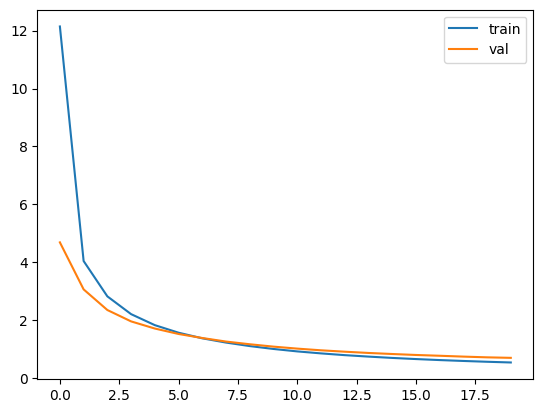

In [18]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.show()

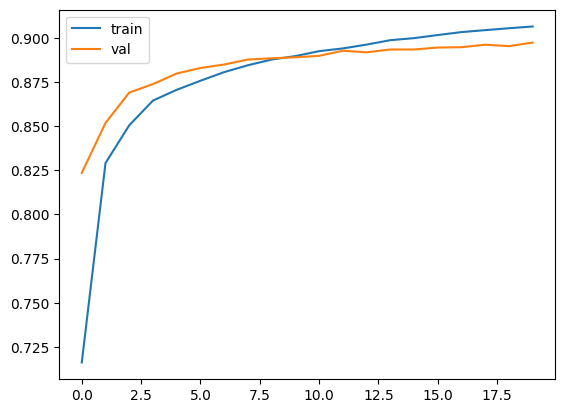

Max Accuracy: 0.9064
Max Val Accuracy: 0.8973


In [19]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()
maxAccuracy = max(history.history["accuracy"])
maxValAccuracy = max(history.history["val_accuracy"])
print(f"Max Accuracy: {maxAccuracy:.4f}")
print(f"Max Val Accuracy: {maxValAccuracy:.4f}")